In [48]:
#pip install eli5

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,ConfusionMatrixDisplay,mean_squared_error

warnings.filterwarnings('ignore')

# DATA DESCRIPTION

ID: Identification number

Diagnosis: Malignant (M) or benign (B)

Mean Measurements: Radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension

Standard Error (SE) Measurements: SE versions of mean measurements

"Worst" or Largest Mean Values: Worst or largest mean values for mean measurements


This dataset is often used for breast cancer diagnosis and prognosis analysis.

### Goal: predict as many as True Positive out of Actual Positive (high recall)

In [24]:
df = pd.read_csv(r"C:\Users\hp\Desktop\Siiiiuuuu\MLRutwik Sir\Cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# PREPROCESSING

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [26]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [27]:
mapDiag = {'B': 0,'M': 1}
df['diagnosis'] = df['diagnosis'].map(mapDiag)

In [28]:
features = list(df.columns[2:32])
X = df[features]
y = df['diagnosis']

In [29]:
discrete_features = X.dtypes==int
mi_scores = mutual_info_regression(X,y,discrete_features=discrete_features)

mi_scores = pd.Series(mi_scores,name ='MI Scores',index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores


perimeter_worst            0.477246
area_worst                 0.464925
radius_worst               0.454258
concave points_mean        0.441825
concave points_worst       0.436956
perimeter_mean             0.404833
concavity_mean             0.379177
radius_mean                0.370765
area_mean                  0.359801
area_se                    0.337218
concavity_worst            0.318123
perimeter_se               0.269180
radius_se                  0.244745
compactness_worst          0.226223
compactness_mean           0.211874
concave points_se          0.130801
texture_worst              0.121513
concavity_se               0.118613
smoothness_worst           0.096765
texture_mean               0.096652
symmetry_worst             0.089428
smoothness_mean            0.078125
compactness_se             0.077013
fractal_dimension_worst    0.065678
symmetry_mean              0.060319
fractal_dimension_se       0.037987
smoothness_se              0.017748
symmetry_se                0

# TRAIN TEST SPLIT

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# RANDOM FOREST CLASSIFIER

The recall score of the Random Forest is 92.5373%


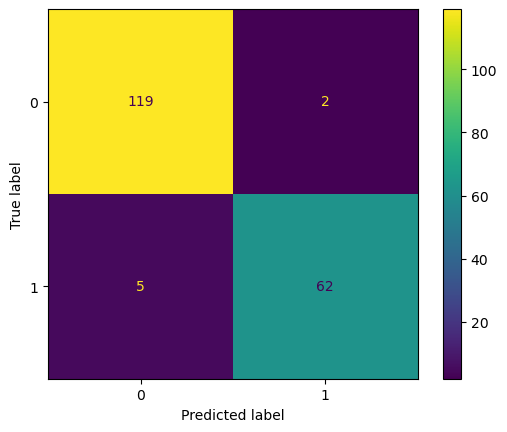

In [31]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(random_state=42).fit(X_train,y_train)
RF_y_pred = RFmodel.predict(X_test)
rfrecall = recall_score(y_test,RF_y_pred)

print(f"The recall score of the Random Forest is {round(rfrecall*100,4)}%")
ConfusionMatrixDisplay.from_estimator(RFmodel,X_test,y_test)

In [32]:
# pip install shap

In [37]:
# print(x_train.shape)
print(X_train.shape)    
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(381, 30)
(188, 30)
(381,)
(188,)


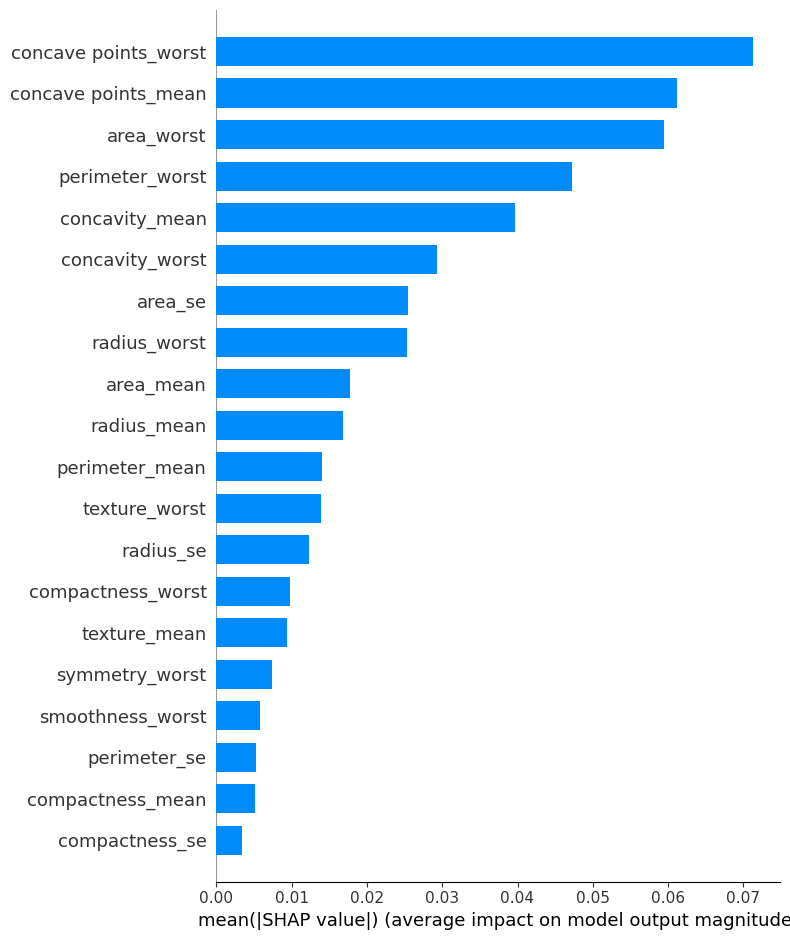

In [52]:
import shap
import matplotlib.pyplot as plt

# Create object that can calculate Shap values
explainer = shap.TreeExplainer(RFmodel)

# Calculate Shap values for the test data
shap_values = explainer.shap_values(X_test)

# Visualize Shapley values for the positive class (index 1)
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar", show=False)
plt.show()



In [44]:
# pip install xgboost

# xg boost

The recall score of the XGB is 95.5224%


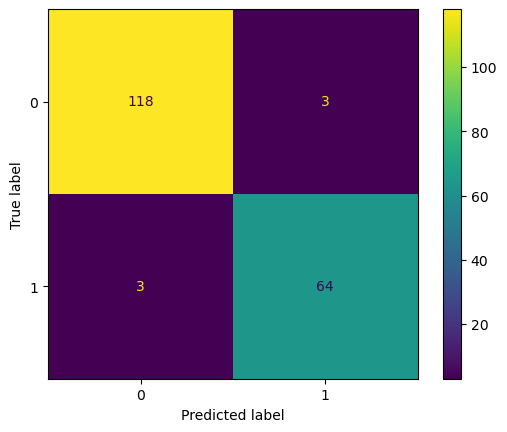

In [43]:
import xgboost as xgb

XGBmodel = xgb.XGBClassifier(n_estimators = 100,learning_rate = 0.5, max_depth = 5, objective="binary:logistic").fit(X_train,y_train,eval_metric='logloss')
XGB_y_pred = XGBmodel.predict(X_test)
xgrecall=recall_score(y_test,XGB_y_pred)
print(f"The recall score of the XGB is {round(xgrecall*100,4)}%")
ConfusionMatrixDisplay.from_estimator(XGBmodel,X_test,y_test)

### Optimize the XGB by tuning hyperparameter and Cross-Validation:
1. max_depth: the maximum depth of a tree
2. learning_rate: Same as the learning rate in CNNs
3. gamma: A note is split only when the resulting split gives a positive reduction in the loss function
4. reg_lambda: L2 regularization term on weights(analogous to Ridge regression)
5. scale_pos_weight: It controls the balance of positive and negative weights. It is useful for imbalanced classes. A value greater than 0 should be used in case of high-class imbalance as it helps in faster convergence

* GridSearchCV is a popular method to find the optimal parameters in the models.
* subsample: Subsample ratio of the training instances. Setting it to 0.9 means that XGBoost would randomly sample 90% of the training data before growing trees, and this will prevent overfitting. Subsampling will occur once   in every boosting iteration
* colsample_bytree: specify the fraction of columns to be subsampled


In [45]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.3, 0.5],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5]
}

optimal_parameters = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=3,
    n_jobs=10,
    cv=3
)

optimal_parameters.fit(X_train,
                       y_train,
                       early_stopping_rounds=10,
                       eval_metric='auc',
                       eval_set=[(X_test, y_test)],
                       verbose=True)

print(optimal_parameters)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[0]	validation_0-auc:0.97669
[1]	validation_0-auc:0.97848
[2]	validation_0-auc:0.98853
[3]	validation_0-auc:0.99198
[4]	validation_0-auc:0.99260
[5]	validation_0-auc:0.99260
[6]	validation_0-auc:0.99260
[7]	validation_0-auc:0.99346
[8]	validation_0-auc:0.99346
[9]	validation_0-auc:0.99297
[10]	validation_0-auc:0.99309
[11]	validation_0-auc:0.99322
[12]	validation_0-auc:0.99309
[13]	validation_0-auc:0.99346
[14]	validation_0-auc:0.99371
[15]	validation_0-auc:0.99383
[16]	validation_0-auc:0.99396
[17]	validation_0-auc:0.99383
[18]	validation_0-auc:0.99383
[19]	validation_0-auc:0.99346
[20]	validation_0-auc:0.99346
[21]	validation_0-auc:0.99359
[22]	validation_0-auc:0.99359
[23]	validation_0-auc:0.99383
[24]	validation_0-auc:0.99359
[25]	validation_0-auc:0.99371
[26]	validation_0-auc:0.99371
GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=Non

In [46]:
print(optimal_parameters.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


#### which gives us the parameters: gamma=1.0, learning_rate=0.5, max_depth=5, reg_lambda=10.0, scale_pos_weight=5

The recall score of the optimized XGB is 95.5224%


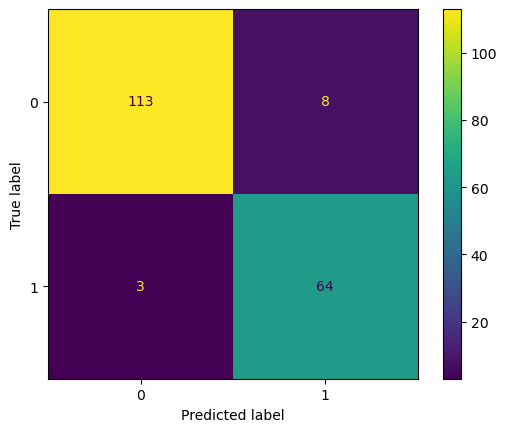

In [47]:
import xgboost as xgb

XGBmodel = xgb.XGBClassifier(n_estimators = 100,
                             learning_rate = 0.5, 
                             max_depth = 5, 
                             objective="binary:logistic",
                             gamma=1.0,
                             reg_lambda=10.0,
                             scale_pos_weight=3
                            ).fit(X_train,y_train,eval_metric='logloss')
XGB_y_pred = XGBmodel.predict(X_test)
xgrecall= recall_score(y_test,XGB_y_pred)

print(f"The recall score of the optimized XGB is {round(xgrecall*100,4)}%")
ConfusionMatrixDisplay.from_estimator(XGBmodel,X_test,y_test)

#### The optimized XG boost performs better than Random Forest  by increasing recall from 92% to 97%. 

# Learnings


**Model Interpretability:**

Random Forest's feature importance scores provide straightforward insights into which features are most influential in predictions, aiding interpretability.
XGBoost's complexity can make interpretation challenging, requiring additional techniques like SHAP values for deeper insights.

**Performance and Efficiency:**

XGBoost often offers superior predictive performance compared to Random Forest, especially in tasks with complex relationships or large datasets.
However, Random Forest can be more efficient in terms of training time and computational resources, making it preferable for certain scenarios.

**Hyperparameter Tuning:**

Fine-tuning hyperparameters is crucial for optimizing model performance in both Random Forest and XGBoost.
Techniques like grid search or random search can efficiently identify optimal hyperparameter configurations, enhancing model effectiveness.